In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [9,99,299]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6006,11093,18881,1159,7425,2098
1,9658,2182,1909,5639,215,323
2,444,879,2060,264,290,259


In [4]:
print "Comparision of chosen samples of wholesale customers dataset with its mean values:"
display(samples - np.around(data.mean().values))

Comparision of chosen samples of wholesale customers dataset with its mean values:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-5994.0,5297.0,10930.0,-1913.0,4544.0,573.0
1,-2342.0,-3614.0,-6042.0,2567.0,-2666.0,-1202.0
2,-11556.0,-4917.0,-5891.0,-2808.0,-2591.0,-1266.0


In [5]:
print "Comparision of chosen samples of wholesale customers dataset with its median values:"
display(samples - np.around(data.median().values))

Comparision of chosen samples of wholesale customers dataset with its median values:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-2498.0,7466.0,14125.0,-367.0,6609.0,1132.0
1,1154.0,-1445.0,-2847.0,4113.0,-601.0,-643.0
2,-8060.0,-2748.0,-2696.0,-1262.0,-526.0,-707.0


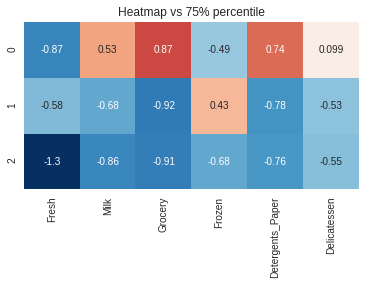

In [6]:
plt.axes().set_title("Heatmap vs 75% percentile")
sns.heatmap((samples-data.quantile(q=0.75))/data.std(ddof=0), annot=True, cbar=False, square=True)

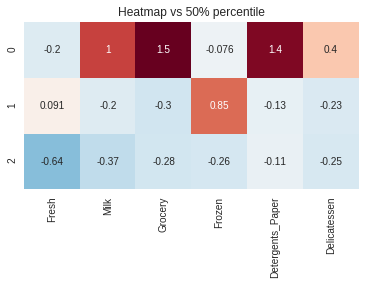

In [7]:
plt.axes().set_title("Heatmap vs 50% percentile")
sns.heatmap((samples-data.quantile(q=0.50))/data.std(ddof=0), annot=True, cbar=False, square=True)

Question 1:

Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.
What kind of establishment (customer) could each of the three samples you've chosen represent?
Hint: Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying "McDonalds" when describing a sample customer as a restaurant.

Answer:
I am comparing both the Mean and Median values of the respective features. And 75th Percentile and 50th Percentile values are used to analyze the behaviour of those features at respective samples.

- Index 0: The Milk, Grocery, Detergents_paper and Delicatessen are greater than the mean and median values of those features. However those values are positive for 75th quadrant as well. I believe this could an another Super Market. Because it has highest amounts of Detergents_Paper and Delicatessen. Though Groceries and milk are also considerable high, Detergents, Paper, and Delicates are supposed to be in Super Markets. 


- Index 1: In this only the Fresh and Frozen items have positive values for comparisions with mean and median values of those features. Rest of the features are considerably in lower quantities. Higher Fresh and Frozen indicates that it could a Restaurant. Compared to 3rd sample this second sample has higher use of Milk as well. This sample could be fairly a restaurant. 


- Index 2: For this sample all the values are less than the the mean and the median values of the features. Even the in 50th Quantile heat map, All of them are negavtive. Grocery feature has comparably higher values than other features on this sample. This could possible a household customer or an indepedent family as a customer. Bases on the quantities purchased for different features. 

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

for i in [ "Delicatessen","Detergents_Paper", "Frozen", "Grocery", "Milk", "Fresh"]:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    target_label = data[i]
    new_data = data.drop([i], axis = 1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data,target_label, test_size=0.25, random_state=25)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=10)
    regressor.fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print "The score after removing a feature %s is %s" %(i, score)

The score after removing a feature Delicatessen is -2.75097624458
The score after removing a feature Detergents_Paper is 0.732577656408
The score after removing a feature Frozen is -0.0162604155132
The score after removing a feature Grocery is 0.819295743919
The score after removing a feature Milk is -0.0614209553709
The score after removing a feature Fresh is -0.978186104941


/home/ravi/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Question 2:

Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?
Hint: The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data.

Answer:

- I have found the score by removing each of the available features. It is found that Detergents_Paper has score around 0.73 and next to it is Grocery with 0.81. As these two features fit the model well. There are few other features which fit the model very badly. They are Delicatessen with a score value around -2.75, Fresh around -0.25, Milk with -0.06 and Frozen around -0.01. 


- From the scores Detergents_paper and Grocery fit well with the data. Indicates that these features correlate well with other and it is easy to predict from the data. So these features are not helpful in identifying the spending habits. That is removing these features did not affect the model badly.


- Features Delicatesen, Fresh, Milk and Frozen could be helpful in identifying the customer's spending habits. Removing these features has affected the model badly. These feature can help us in determing the customer spending habits. 

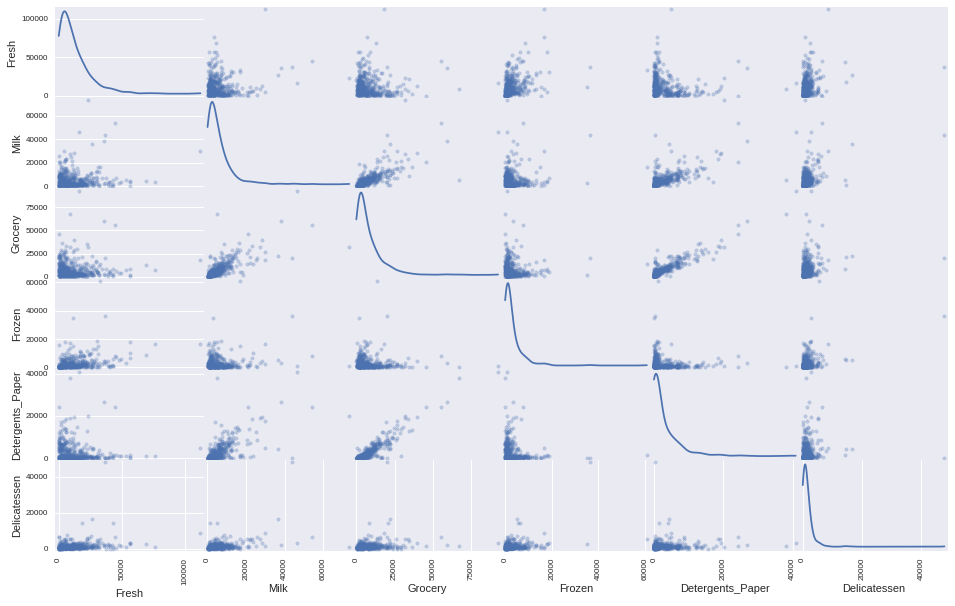

In [9]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (16,10), diagonal = 'kde');

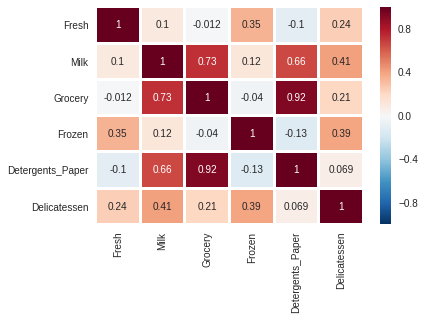

In [10]:
sns.heatmap(data.corr(), annot=True, linewidths =2.0)

Question 3:

Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?
Hint: Is the data normally distributed? Where do most of the data points lie?

Answer:
- After analyzing both the scatter matrix and heapmap. It appears that there is a correlation between Detergents_papers and Grocery (Value of 0.92), Grocery and Milk (with a value of 0.73) and Detergent_paper and Milk (with a value of 0.66). Earlier I belived that features like Grocery and Detergent_paper are easily predictable. Now it confirms that the removal of any of those features do not impact in determing the spending habits of customers. As they were correlated.

- While analyzing the scatter matrix plots. There is no perfect symmetry for those plots. Most of the plots are skwed towards rightside in direction. And for Delicatesen feature data is skewed towards upwards but appears to have some outliers in the data. For all the features most of the datapoints lie near near the origin. That is at point zero. Most of the datapoints lie within halfway(50%) of the dataplane of those respective features. 

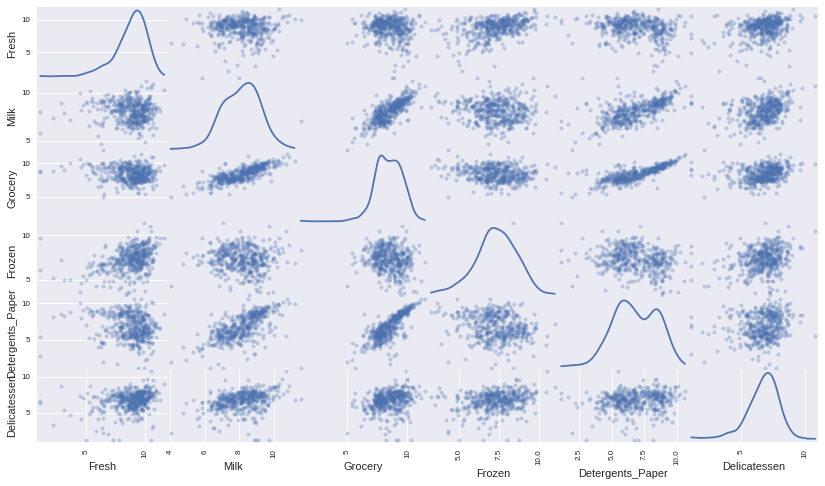

In [11]:
import scipy
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

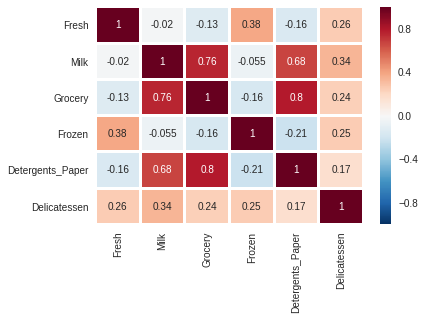

In [12]:
sns.heatmap(log_data.corr(), annot=True, linewidths =2.0)

In [13]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740
1,9.175542,7.687997,7.554335,8.637462,5.370638,5.777652
2,6.095825,6.778785,7.630461,5.575949,5.669881,5.556828


In [14]:
total_outliers = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = ((Q3-Q1))*1.50
    
    feature_outlier_chunk = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(feature_outlier_chunk)
    
    total_outliers += feature_outlier_chunk.index.tolist()
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers1  = list(set(total_outliers))
print "The indices list of outliers is %s" %(outliers1)
print "Length of outlier list is %s" %(len(outliers1))

import collections
temp = collections.Counter(total_outliers)
temp1 = zip(temp.keys(),temp.values())
temp2 = [list(i)[0] for i in temp1 if  list(i)[1] >1]

print "The list of datapoints considered ouliers for morethan one feature is %s" %(temp2)

outliers = temp2
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
    

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


The indices list of outliers is [128, 193, 264, 137, 142, 145, 154, 412, 285, 161, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 203, 325, 289, 75, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183]
Length of outlier list is 42
The list of datapoints considered ouliers for morethan one feature is [128, 154, 65, 66, 75]


Question 4

Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the outliers list to be removed, explain why.

Answer:
- Yes there are 5 data points considered outliers for more than one feature. They are [128, 154, 65, 66, 75]. These outliers are beyond the scope of 1.5 times the IQR range. In order to avoid the distorted dataset. It is better to remove those datapoints from the dataset. All the datapoints in [128, 154, 65, 66, 75] can be added to outlier list as they tend to skew the dataset for mutiple features. 


- After analyzing the scatter matrix plot for good_data. It can be emphasized that datapoints are spreadout when compared to scatter matrix plot of log_data. Plots in good_data below are little sparse while plots for log_data above much denser. Dropping the extreme datapoints can be advantageous as it helps in reducing the error inference and do not have constant pattern in data. 


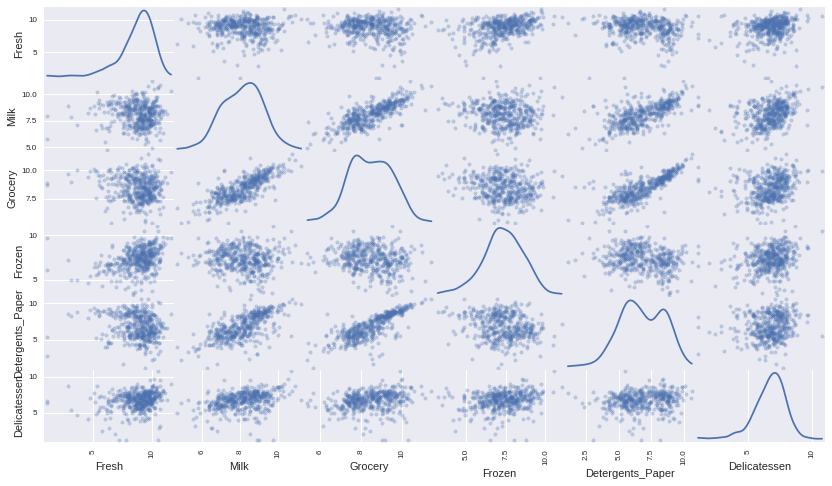

In [15]:
# Produce a scatter matrix for each pair of good_data features
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

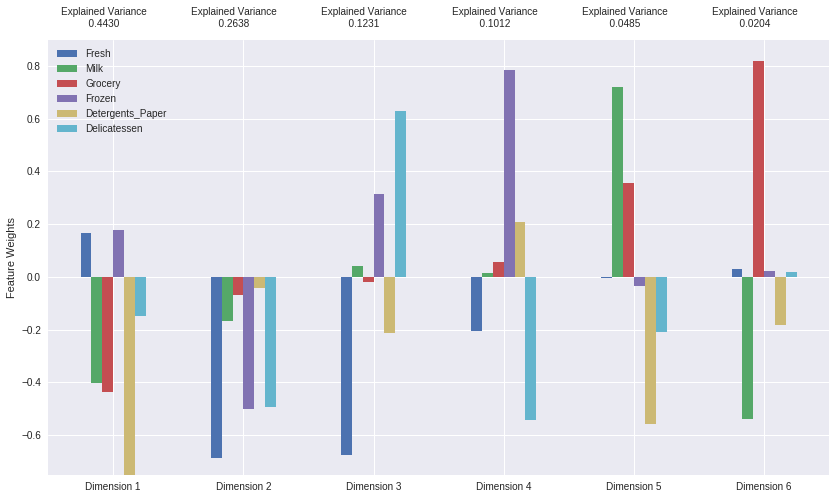

In [16]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

Question 5

How much variance in the data is explained in total by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.
Hint: A positive increase in a specific dimension corresponds with an increase of the positive-weighted features and a decrease of the negative-weighted features. The rate of increase or decrease is based on the individual feature weights.

Answer:

- The total variance in first and second principal components are 0.4430+0.2638 = 0.7068. The total variance of first 4 principal components are 0.7068+0.1231+0.1012 = 0.9311. As first 4 PC's constitute for a variance of 0.93. It can be understood that these 4 PC's has large chunk of information about the dataset. Each customer is a linear combination of all the PCA dimensions. 


- 1st Dimension: Increase in PC-1 is associated with increases in "Milk", "Grocery" and "Detergents_Paper" values in magnitude. Fresh and Frozen features have positive weights whereas other features have negative weights. This dimension is more dominated by the negative weighed features. In this dimension the highly correlated features like Detergent_paper, Grocery and Milk have feature weights of greater than or equal to -0.5. (In negative direction.). Previously we observed that Detergent_paper and Grocery are highly correlated. And there is a correlation between milk and grocery. This similar to our previous assumption on correlation. Significant weight is placed on 'Detergents_Paper' and a meaningful weight on 'Milk' and 'Grocery'.  

- 2nd Dimesnion: Increase in PC-2 is associated with increases in "Fresh", "Frozen" and "Delicatessen" values in magnitude. In this PC-2 all features are having negative feature weights. Large values (in negative direction) are for observed for Fresh items. Delicates and Frozen as well are having larger negative values. The correlated features found in PC-1 are having lower values (negative) in PC-2.   

- 3rd Dimension: Increase in PC-3 is associated with a increase in "Delicatessen" and decrease in "Detergents_paper" values in mangnitude. In this Delicatessen, Frozen and Milk have positive feature weights and other feature weights are negative. As delicatessen have very high positive feature weights and then Frozen and Milk.  

- 4th Dimension: Increase in PC-4 is associated with a increasing in "Frozen" and a decrease in "Delicatessen" values in magnitude. The features with highest positive wieghts are in the order of Frozen, Detergents_paper, Grocery, and Milk. The other features are having negative feature weights. 



In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.8734,-0.6774,0.1330,-0.1802,-0.0250,0.1224
1,2.0868,-0.2863,-0.1372,1.0893,0.3058,-0.2241
2,1.1654,3.6017,0.7443,-0.5111,-0.3326,0.1179


In [18]:

# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.8734,-0.6774
1,2.0868,-0.2863
2,1.1654,3.6017


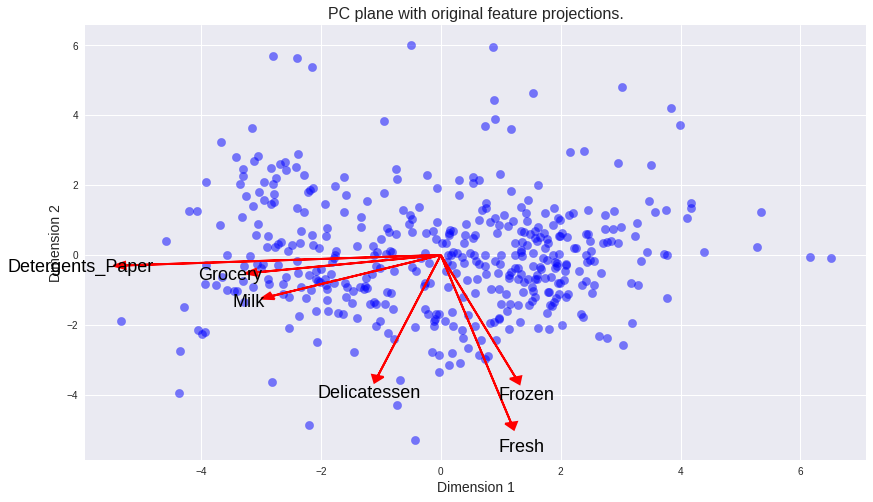

In [20]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

Question 6

What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

Answer:
- K-Means Clustering: It is simple and faster, because order of time complexity is linear with the number of data. K-Means works better if the clusters are Spherical. K-means becomes a great solution for pre-clustering, reducing the space into disjoint smaller sub-spaces where other clustering algorithms can be applied. 
- Gaussian Mixture Model: GMM is lot more flexible in terms of cluster variance. K-Means is special case of GMM where all dimensions approaches zero. IN GMM each cluster can have unconstrained covariance structure. Cluster assignment is much more flexible in GMM than in k-means. In GMM a point belongs to each cluster to a different degree .i.e. GMM accomodates mixed membership. 
- Though after analyzing the scatter matrix plots and the biplots of the dataset. It is observed that data appears to be uniform. If you consider the good_data analysis. There are unique 42 datapoints (combined) that behave as outliers for all features when considered each feature individually. And only 5 data points considered outliers for more than one feature. So, there can be issues of uncertainity when considered "hard assignent" of K-Means clustering. So, I would prefer to go with "soft assignment" of GMM. 

In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def bestcluster(size):

    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=size,random_state=10)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds,metric="euclidean", random_state=10)

    print "By using %s clusters the score is %s " %(size,score)
    
for i in range(2,21):
        bestcluster(i)


By using 2 clusters the score is 0.421916846463 
By using 3 clusters the score is 0.375532188938 
By using 4 clusters the score is 0.293269564847 
By using 5 clusters the score is 0.318503760274 
By using 6 clusters the score is 0.294294828555 
By using 7 clusters the score is 0.33796693332 
By using 8 clusters the score is 0.312429666347 
By using 9 clusters the score is 0.307753432384 
By using 10 clusters the score is 0.299186881946 
By using 11 clusters the score is 0.31227195817 
By using 12 clusters the score is 0.305886112962 
By using 13 clusters the score is 0.295177790564 
By using 14 clusters the score is 0.323622167443 
By using 15 clusters the score is 0.314069461351 
By using 16 clusters the score is 0.305032847685 
By using 17 clusters the score is 0.308260902247 
By using 18 clusters the score is 0.301980878262 
By using 19 clusters the score is 0.329805340957 
By using 20 clusters the score is 0.313064237123 


Question 7 

Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?

Answer:

- I have created a cluster using a GMM and calculated silhouette core for 2 to 20 clusters. Those scores were printed above. And the highest possible score is around 0.42 for a cluster size of two. And I think 2 is the best possible cluster size based on the silhouette score. 

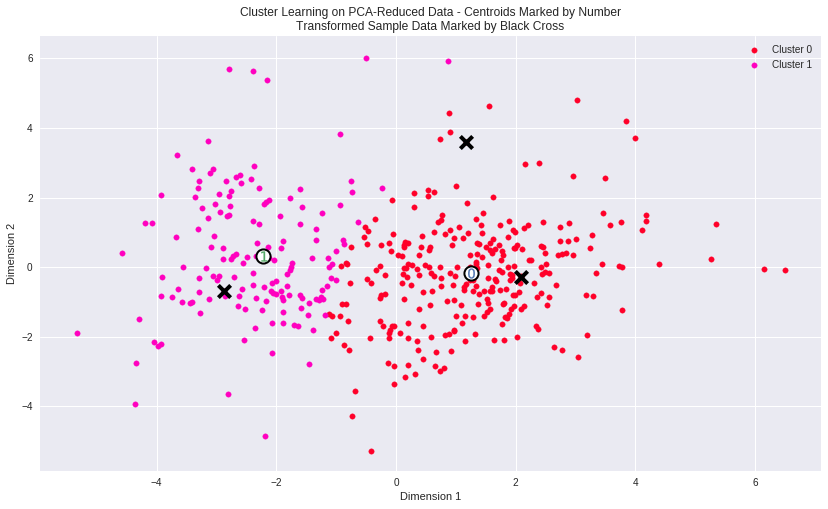

In [22]:
#Optimal number of clusters choose is 2.
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer1 = GaussianMixture(n_components=2,random_state=10)
clusterer1.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds1 = clusterer1.predict(reduced_data)

# TODO: Find the cluster centers
centers1 = clusterer1.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds1 = clusterer1.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score1 = silhouette_score(reduced_data,preds1,metric="euclidean", random_state=10)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds1, centers1, pca_samples)

In [23]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers1)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers1))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


In [24]:
good_unscaled_data = data.drop(data.index[outliers]).reset_index(drop = True)

print "Centers offset from mean"
display(true_centers - np.around(good_unscaled_data.mean().values))

print "Centers offset from median"
display(true_centers - np.around(good_unscaled_data.median().values))


Centers offset from mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3136.0,-3674.0,-5146.0,-1021.0,-2495.0,-805.0
Segment 1,-8537.0,2049.0,4308.0,-2226.0,1848.0,-575.0


Centers offset from median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,388.0,-1520.0,-1992.0,534.0,-460.0,-235.0
Segment 1,-5013.0,4203.0,7462.0,-671.0,3883.0,-5.0


In [25]:
good_unscaled_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,12089.372414,5788.103448,7911.158621,3096.126437,2848.473563,1536.797701
std,12662.796341,7374.172350,9365.740973,4873.769559,4679.364623,2833.363881
min,3.000000,112.000000,218.000000,25.000000,3.000000,3.000000
25%,3208.000000,1579.500000,2156.000000,770.500000,260.000000,411.500000
50%,8565.000000,3634.000000,4757.000000,1541.000000,813.000000,967.000000
75%,16934.500000,7168.000000,10665.500000,3559.500000,3935.000000,1825.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


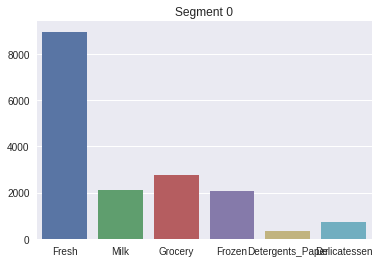

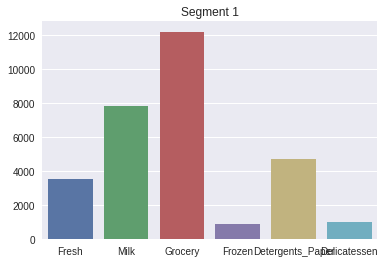

In [26]:
plt.figure()
plt.axes().set_title("Segment 0")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values)

plt.figure()
plt.axes().set_title("Segment 1")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values)



Question 8

Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. What set of establishments could each of the customer segments represent?
Hint: A customer who is assigned to 'Cluster X' should best identify with the establishments represented by the feature set of 'Segment X'.

Answer:
By analyzing statistical properties and the offset shifts for median and mean values. And observing the bar plots for true_centers.
- Segment 0: In this Fresh items have very high values. Though the rest of the items have values less than 3000. I believe this segment could be a retail selling agency. These retail selling agencies can include Restaraunts, Caffe, Bakery, Household Customers, etc.. I believe this segment is a Retail Selling Agency. 
- Segment 1: In this the grocery has value of morethan 12,000. And a milk value around 8,000. Both Detergents_paper and Fresh values are around 4,000. Compared to segment1. This segment could belong to Bulk Selling agency. This Bulk selling agency can include Super Markets or large scale sellers, etc.. I believe this is a Bulk Selling Agency.


Question 9

For each sample point, which customer segment from Question 8 best represents it? Are the predictions for each sample point consistent with this?

Run the code block below to find which cluster each sample point is predicted to be.


In [27]:
# Display the predictions
for i, pred in enumerate(sample_preds1):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


Sample Point 0:
- Original Index - 9
- My Assumption - Super Market
- Representational Segment - Segment 1
- Current Prediction - Bulk Selling Agency
- Consistency ? - Yes, Prediction is consistent with assumption I made previously.

Sample Point 1:
- Original Index - 99
- My Assumption - Restaraunt
- Representational Segment - Segment 0
- Current Prediction - Retail Selling Agency
- Consistency ? - Yes, Prediction is consistent with assumption I made previously.

Sample Point 2:
Sample Point 1:
- Original Index - 299
- My Assumption - Household Customer
- Representational Segment - Segment 0
- Current Prediction - Retail Selling Agency
- Consistency ? - Yes, Prediction is consistent with assumption I made previously.


All the predictions for the sample points are in consistent with my assumption previously.

Question 10

Companies will often run A/B tests when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?
Hint: Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

Answer:
- I don't think changing the delivery schedules with just 2 clusters is effective. Because if we consider segment 0, where Fresh food is very dominating. And we believed this is a Retail Selling Agency which includes the restaraunts, Caffes, Household customers, etc.. For household customer's case, they make purchases in smaller values. And their purchase frequency can be determined easily. They migh prefer delivery in evening hours as well. So changing delivery service may not have bad effect on Household customers. But for Restaruants, Caffes and other retail selling agency, they do business with the fresh food mostly. And usually the business sales are unpredictable. If they are done with their resources, they make orders and expect them to be delivered on the same day. Changing delivery service will impact badly for these outlets. So, on a larger perspective changing delivery service impacts badly for retail selling agencies.

- For segment 2, the groceries and milk are more dominating. And we expected this as Bulk Selling agencies. There will be frequent orders from Bulk sellers. They expect deliveries to be made during day time not in the evenings. Their order frequency will be higher than that of the retail sellers. So, I think even this segment  will have negative impact in changing the delivery service. 


- For testing, I made optimum cluster size as 3 instead of 2. This helped me to create a new cluster for Household customers, who have small purchase values on all the features. On this segment, we can try changing the delivery service. And I believe that could yeild some positive results. But I don't think it would give positive results with just two clusters. Generalization is not easy for retail selling agency segment. 

- With all this analysis, we can do A/B tests and generalize the customer behaviour by change in delivery service for chosen sample space in each cluster. And evaluate all feedbacks independently and individually. And can understand whether change in delivery service has good or bad impact. 




Question 11

Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a customer segment it best identifies with (depending on the clustering algorithm applied), we can consider 'customer segment' as an engineered feature for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a customer segment to determine the most appropriate delivery service.
How can the wholesale distributor label the new customers using only their estimated product spending and the customer segment data?
Hint: A supervised learner could be used to train on the original customers. What would be the target variable?

Answer:
- I would prefer to use unsupervised model firstly to detrmine "customer segment" engineered feature. In this case, "customer segment" feature has only two values either 0 or 1.
- Then build a supervised learning with target label as "customer segment" based on the anticipated annual spending of each product trained well with original customers. In this way new customers can be segregated into "customer segment" based on the learners in supervised model.
- The adaptable supervised models in this cases can be SVM's and Random Forests or other models and neccesary data optimizations should be done.


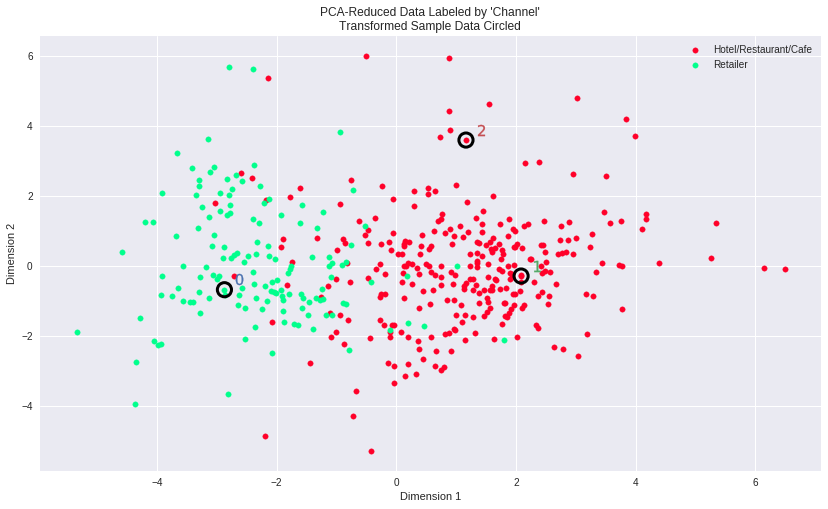

In [28]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

In the above plot, visual.py considered the two segments as either Hotels or Retailers. But according to my project.
- Red colored points - Retail selling agencies (Includes Hotels, Restaraunts, Caffes, Household customers, etc..)
- Green Colored points - Bulk selling agnecies (Includes Super Markets, Large selling agencies, etc,..)


Question 12

How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?

Answer:
- The number clusters I have chosen is two and in this distribution the channels are two as well. The customer segments determined are two. The sample predictions exactly lie in the same channel/cluster. They are consistent with our assumption and prediction.
- Yeah there are some customer segments which are purely 'Retailers' (Bulk Selling Agencies Per my project) or 'Hotels/Restaurants/Cafes'(Retail selling agency per my project). by this distribution. Consider the green datapoints (<-4) left side of retailers. They are purely retailers. Similarly red datapoints, (>2) right side of Hotels/restaraunts/caffe they are 'Hotels/Restaurants/Cafes'. 
- These classifications as consistent with your previous definition of the customer segments. Cluster 1 - 'Retailers' - Bulk selling agnecies (Includes Super Markets, Large selling agencies, etc,..) and cluster 0 - 'Hotels/Restaurants/Cafes' - Retail selling agencies (Includes Hotels, Restaraunts, Caffes, Household customers, etc..). 

In [65]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC

customer_segment1 = []
for i,j in enumerate(preds1):
    customer_segment1.append(j)
se = pd.Series(customer_segment1)
reduced_data["customer_segments"]=se.values
target_label1 = reduced_data["customer_segments"]
X1_train, X1_test, y1_train, y1_test = train_test_split(reduced_data,target_label1, test_size=0.3, random_state=25)

clf = SVC(gamma=0.01, random_state=10)
clf.fit(X1_train, y1_train) 
k = clf.predict(X1_test[:40])
print clf.score(X1_test[40:],y1_test[40:])

1.0
